In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
#from desi_retriever.denali import get_specs
import matplotlib.cm as cm
import scipy.ndimage as sn
import desispec.tsnr as dts 
import my_plot_style as mps
mps.my_plot_style()

In [245]:
directory_everest = '/global/cfs/cdirs/desi/spectro/redux/everest/zcatalog/'
file_name = 'ztile-sv1-dark-cumulative.fits'
#file_name = 'ztile-main-bright-cumulative.fits'
#file_name = 'ztile-sv1-bright-pernight.fits'
file_name = 'ztile-main-dark-cumulative.fits'
everest_all = Table.read(directory_everest+file_name)

In [252]:
search= np.where((everest_all['OBJTYPE']=='SKY') & (everest_all['DELTACHI2']<10000000) & (everest_all['Z']>-0.1) & (everest_all['Z']<5))  
search_pass = np.where((everest_all['OBJTYPE']=='SKY') & (everest_all['DELTACHI2']>10) & (everest_all['DELTACHI2']<10000000) & (everest_all['Z']>-0.1) & (everest_all['Z']<5)) 

In [253]:
pass_n = len(search_pass[0])
total_n = len(search[0])

(-3.0, 4.9)

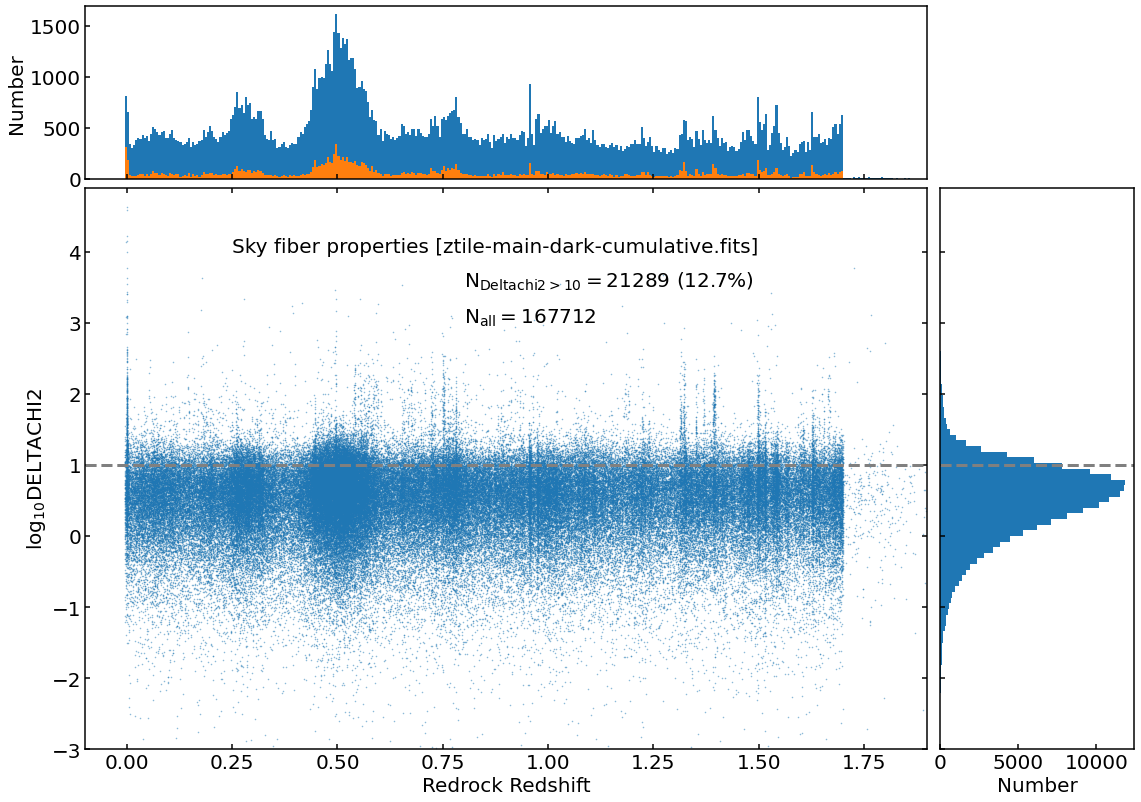

In [254]:
x = everest_all['Z'][search[0]]
y = np.log10(everest_all['DELTACHI2'][search[0]])
x2 = everest_all['Z'][search_pass[0]]
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.01


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.15, height]

# start with a rectangular Figure
plt.figure(figsize=(18, 12))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y,s=0.3,alpha=0.5)
ax_scatter.set_ylabel('$\\rm log_{10} DELTACHI2$')
ax_scatter.set_xlabel('Redrock Redshift')
# now determine nice limits by hand:
binwidth = 0.25
#lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-0.1, 1.9))
ax_scatter.set_ylim((-3, 4.9))
ax_scatter.text(0.25,4,'Sky fiber properties ['+file_name+']',fontsize=20)
ax_scatter.text(0.8,3.5,'$\\rm N_{Deltachi2>10}=%0.0f \\ (%0.1f \\%%)$' % (pass_n,100*pass_n*1.0/total_n),fontsize=20)
ax_scatter.text(0.8,3.,'$\\rm N_{all}=%0.0f $' % total_n,fontsize=20)
pass_n
ax_scatter.axhline(1,ls='--',color='grey',lw=3)
bins = np.arange(-lim, lim + binwidth, binwidth)
#plt.yscale('log')
#plt.xscale('log')
ax_histx.hist(x, range=(-0.1,1.9),bins=400)
ax_histx.hist(x2, range=(-0.1,1.9),bins=400,color='C1')
ax_histx.set_ylabel('Number')
#ax_histx.set_yscale('log')
ax_histy.hist(y, range=(-3,4.9),bins=100, orientation='horizontal')
ax_histy.set_xlabel('Number')
ax_histy.axhline(1,ls='--',color='grey',lw=3)


#plt.xscale('log')
#plt.yscale('log')
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())